In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
elect_data = pd.read_csv('electricity_grid.csv')
elect_data.shape

(10000, 14)

In [3]:
elect_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
elect_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
elect_data.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [6]:
elect_data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
elect_data.stabf = encoder.fit_transform(elect_data.stabf)


In [8]:
elect_data.drop(['stab'],axis=1)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,1
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,0
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,0
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,1


In [9]:
X = elect_data.drop(columns='stabf')
y = elect_data['stabf']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(X)

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=1)

Question 12

Question 13

Question 14

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
forest.fit(x_train, y_train)
new_predict = forest.predict(x_test)
cnf_matt = confusion_matrix(y_true=y_test, y_pred=new_predict)# labels=['2A', '3A'])
print('Confusion matrix\n\n', cnf_matt)
print('\nTrue Positives(TP)=', cnf_matt[0,0])
print('\nTrue Negatives(TN)=',cnf_matt[1,1])
print('\nFalse Positives(FP)=', cnf_matt[0,1])
print('\nFalse Negatives(FN)=', cnf_matt[1,0])

print(classification_report(y_test,new_predict))
print("accuracy on training set: %f" % forest.score(x_train, y_train))
print("accuracy on test set: %f" % forest.score(x_test, y_test))

Confusion matrix

 [[ 712    0]
 [   1 1287]]

True Positives(TP)= 712

True Negatives(TN)= 1287

False Positives(FP)= 0

False Negatives(FN)= 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

accuracy on training set: 1.000000
accuracy on test set: 0.999500


Question 15

In [13]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=1)
xg.fit(x_train, y_train)
predictions = xg.predict(x_test)
mat = confusion_matrix(y_true=y_test, y_pred=predictions)# labels=['2A', '3A'])
print('Confusion matrix\n\n', mat)
print('\nTrue Positives(TP)=', mat[0,0])
print('\nTrue Negatives(TN)=', mat[1,1])
print('\nFalse Positives(FP)=', mat[0,1])
print('\nFalse Negatives(FN)=', mat[1,0])

print(classification_report(y_test,predictions))
print("accuracy on training set: %f" % xg.score(x_train, y_train))
print("accuracy on test set: %f" % xg.score(x_test, y_test))

C:\Users\Public\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,


Confusion matrix

 [[ 712    0]
 [   1 1287]]

True Positives(TP)= 712

True Negatives(TN)= 1287

False Positives(FP)= 0

False Negatives(FN)= 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

accuracy on training set: 1.000000
accuracy on test set: 0.999500


Question 16

In [14]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(random_state=1)
clf.fit(x_train,y_train)
y_pred_train =clf.predict(x_train)
y_pred =clf.predict(x_test)

mat = confusion_matrix(y_test, y_pred)# labels=['2A', '3A'])

print('Confusion matrix\n\n', mat)
print('\nTrue Positives(TP)=', mat[0,0])
print('\nTrue Negatives(TN)=', mat[1,1])
print('\nFalse Positives(FP)=', mat[0,1])
print('\nFalse Negatives(FN)=', mat[1,0])

print(classification_report(y_test,y_pred))
print("accuracy on training set: %f"% accuracy_score( y_train,y_pred_train))
print("accuracy on test set: %f" % accuracy_score( y_test,y_pred))

Confusion matrix

 [[ 711    1]
 [   5 1283]]

True Positives(TP)= 711

True Negatives(TN)= 1283

False Positives(FP)= 1

False Negatives(FN)= 5
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       712
           1       1.00      1.00      1.00      1288

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

accuracy on training set: 1.000000
accuracy on test set: 0.997000


Question 17

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
fod = ExtraTreesClassifier(random_state=1)
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

fod_cv = RandomizedSearchCV(fod, hyperparameter_grid, cv=5,random_state=1)
fod_cv.fit(data, y)
best_parameters =fod_cv.best_params_
best_parameters

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

Question 18

Question 19

Question 20

[1.30716423e-02 1.26713440e-02 1.02954706e-02 1.15364539e-02
 8.57300075e-05 1.23278943e-04 1.44247452e-04 1.19427319e-04
 2.54835606e-03 2.96279794e-03 4.46826375e-03 2.81889647e-03
 9.39154091e-01]


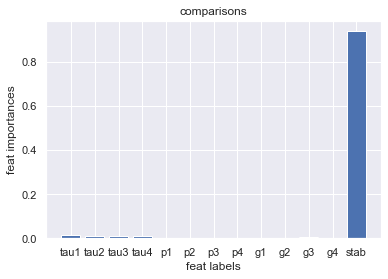

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
fod = ExtraTreesClassifier(random_state=1,**best_parameters)

fod.fit(X, y)
feat_import =fod.feature_importances_
print(feat_import)
#feat_norm =np.std([tree.feature_importances_ for tree in fod.estimators_],axis=0)
plt.bar(X.columns,feat_import)
plt.xlabel('feat labels')
plt.ylabel('feat importances')
plt.title('comparisons')
plt.show()

[0.0586858  0.05544383 0.05559811 0.05703188 0.0160956  0.01667952
 0.01592875 0.01619362 0.03736053 0.04255952 0.04448314 0.04122104
 0.54271867]


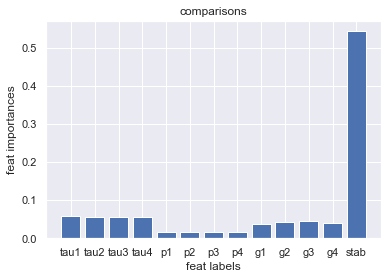

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
fod = ExtraTreesClassifier(random_state=1)#,**best_parameters)

fod.fit(X, y)
feat_import =fod.feature_importances_
print(feat_import)
#feat_norm =np.std([tree.feature_importances_ for tree in fod.estimators_],axis=0)
plt.bar(X.columns,feat_import)
plt.xlabel('feat labels')
plt.ylabel('feat importances')
plt.title('comparisons')
plt.show()